<h1> Классификация спама в e-mail сообщениях

<h2> Постановка задачи:</h2>
<p>Дан датасет - сообщения и пометка, является ли это сообщение спамом (957 сообщений на тренировочной выборке и 125 на тестовой). Цель задачи - научиться автоматически помечать сообщения со спамом.</p>

<h3> Читаем тренировочные данные

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np          
import seaborn as sns         
import sklearn
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


train_dataset = []
test_dataset = []
dataset = []

train_dataset = pd.read_csv("archive/SMS_train.csv", sep=',', encoding="Windows-1252")
test_dataset = pd.read_csv("archive/SMS_test.csv", sep=',', encoding="Windows-1252")

dataset = pd.concat((train_dataset, test_dataset))
#dataset = train_dataset

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mievs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mievs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3> Взглянем на информацию о датасете

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
dataset.shape

(1082, 3)

In [37]:
dataset.head(10)

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
5,6,REMINDER FROM O2: To get 2.50 pounds free call...,Spam
6,7,Huh y lei...,Non-Spam
7,8,Why don't you wait 'til at least wednesday to ...,Non-Spam
8,9,Ard 6 like dat lor.,Non-Spam
9,10,Ok lor... Sony ericsson salesman... I ask shuh...,Non-Spam


In [38]:
dataset.tail(10)

,S. No.,Message_body,Label
115,116,I'm awake oh. What's up.,Non-Spam
116,117,Think + da. You wil do.,Non-Spam
117,118,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...,Non-Spam
118,119,I am in hospital da. . I will return home in e...,Non-Spam
119,120,Gettin rdy to ship comp,Non-Spam
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


<h3> Получаем набор всех слов встречающихся в выборке (Составляем "Мешок слов")

In [40]:
tokens = []


for xl in dataset["Message_body"]:
    token = nltk.word_tokenize(str(xl).lower())
    token = [t for t in token if len(t) > 2]
    for t in token:
        tokens.append(t)
tokens = set(tokens)
tokens = list(tokens)

In [41]:
def gram_tokens(tokens, gram = 2):
    if gram > 1:
        t = []
        for i in range(len(tokens) - gram + 1): 
            t += [" ".join(tokens[i:i + gram])]
        return t

def process_tokens(tokens, stem = True, stop_words = True):
    if stop_words:
        sw = stopwords.words("english")
        tokens = [token for token in tokens if token not in sw]
    if stem:
        stemmer = nltk.PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
    return tokens

In [42]:
#tokens = gram_tokens(tokens, 2)
tokens = process_tokens(tokens, False, False)

In [43]:
#количество неповторяющихся слов
tokens.__len__()

3516

<h3> Обрабатываем датасет. Теперь для каждой записи указано сколько раз встречается то или иное слово в сообщении

In [44]:
from collections import Counter

def bag_of_words(tokens, dataset):
    df = pd.DataFrame(dataset)
    for index, row in dataset.iterrows():
        msg_tokens = nltk.word_tokenize(str(row["Message_body"]).lower())
        msg_tokens = [t for t in msg_tokens if len(t) > 2]
        #msg_tokens = gram_tokens(msg_tokens, 2)
        msg_tokens = process_tokens(msg_tokens, False, False)
        count_letter = Counter(msg_tokens)
        for token in tokens:
            df.loc[index, token] = count_letter[token]
    return df.copy()

df = bag_of_words(tokens, dataset)


df.drop("Message_body", axis=1, inplace=True)

In [45]:
df.to_csv("new_data.csv")

In [46]:
df.drop("S. No.", axis=1, inplace=True)

<h3> Вот так теперь выглядит датасет

In [47]:
df.head(10)

,Label,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,...,traffic,realise,goverment,malaria,gary,fights,player,working,revealing,limit
0,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Non-Spam,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Columns: 3517 entries, Label to limit
dtypes: float64(3516), object(1)
memory usage: 29.1+ MB


In [49]:
df.iloc[:,0] = df.iloc[:,0].astype('category')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Columns: 3517 entries, Label to limit
dtypes: category(1), float64(3516)
memory usage: 29.1 MB


<h3> Сводная таблица по количественным признакам встречающихся слов

In [51]:
df.describe()

,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,eight,...,traffic,realise,goverment,malaria,gary,fights,player,working,revealing,limit
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.0,1082.0
mean,0.001848,0.001848,0.001848,0.000924,0.000924,0.000924,0.001848,0.000924,0.001848,0.000924,...,0.000924,0.002773,0.000924,0.002773,0.001848,0.000924,0.003697,0.003697,0.0,0.0
std,0.042973,0.042973,0.042973,0.030401,0.030401,0.030401,0.042973,0.030401,0.060802,0.030401,...,0.030401,0.052607,0.030401,0.091203,0.042973,0.030401,0.060717,0.060717,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


<h3> Сводная таблица по категориям сообщений

In [52]:
df.describe(include = ['category'])

,Label
count,1082
unique,2
top,Non-Spam
freq,884


<h3> Строим корреляционную матрицу

In [69]:
corr_matrix = df.corr()
corr_matrix

,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,eight,...,innocent,traffic,realise,goverment,malaria,gary,fights,player,working,limit
shld,1.000000,-0.001852,-0.001852,-0.001309,-0.001309,-0.001309,-0.001852,-0.001309,-0.001309,-0.001309,...,-0.001309,-0.001309,-0.002269,-0.001309,-0.001309,-0.001852,-0.001309,-0.002621,-0.002621,NaN
or2stoptxt,-0.001852,1.000000,-0.001852,-0.001309,-0.001309,-0.001309,-0.001852,-0.001309,-0.001309,-0.001309,...,-0.001309,-0.001309,-0.002269,-0.001309,-0.001309,-0.001852,-0.001309,-0.002621,-0.002621,NaN
09064019788,-0.001852,-0.001852,1.000000,-0.001309,-0.001309,-0.001309,-0.001852,-0.001309,-0.001309,-0.001309,...,-0.001309,-0.001309,-0.002269,-0.001309,-0.001309,-0.001852,-0.001309,-0.002621,-0.002621,NaN
area,-0.001309,-0.001309,-0.001309,1.000000,-0.000925,-0.000925,-0.001309,-0.000925,-0.000925,-0.000925,...,-0.000925,-0.000925,-0.001604,-0.000925,-0.000925,-0.001309,-0.000925,-0.001853,-0.001853,NaN
pub/cafe,-0.001309,-0.001309,-0.001309,-0.000925,1.000000,-0.000925,-0.001309,-0.000925,-0.000925,-0.000925,...,-0.000925,-0.000925,-0.001604,-0.000925,-0.000925,-0.001309,-0.000925,-0.001853,-0.001853,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gary,-0.001852,-0.001852,-0.001852,-0.001309,-0.001309,-0.001309,-0.001852,-0.001309,-0.001309,-0.001309,...,-0.001309,-0.001309,-0.002269,-0.001309,-0.001309,1.000000,-0.001309,-0.002621,-0.002621,NaN
fights,-0.001309,-0.001309,-0.001309,-0.000925,-0.000925,-0.000925,-0.001309,-0.000925,-0.000925,-0.000925,...,-0.000925,-0.000925,-0.001604,-0.000925,-0.000925,-0.001309,1.000000,-0.001853,-0.001853,NaN
player,-0.002621,-0.002621,-0.002621,-0.001853,-0.001853,-0.001853,-0.002621,-0.001853,-0.001853,-0.001853,...,-0.001853,-0.001853,-0.003212,-0.001853,-0.001853,-0.002621,-0.001853,1.000000,-0.003711,NaN
working,-0.002621,-0.002621,-0.002621,-0.001853,-0.001853,-0.001853,-0.002621,-0.001853,-0.001853,-0.001853,...,-0.001853,-0.001853,-0.003212,-0.001853,-0.001853,-0.002621,-0.001853,-0.003711,1.000000,NaN


<AxesSubplot:>

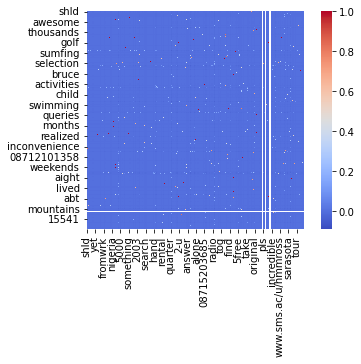

In [70]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')

Визуализировав корреляционную матрицу мы видим связь между некоторыми словами. Подобное происходит оттого, что в человеческой речи слова связаны друг с другом по смыслу.
На данный момент мы не можем воспользоваться этой информацией, поэтому попробуем найти корреляцию слов от типа сообщения

<h3> Визуализируем какие слова чаще всего используются в сообщениях со спамом

Для поиска таких слов воспользуемся библиотекой WordCloud

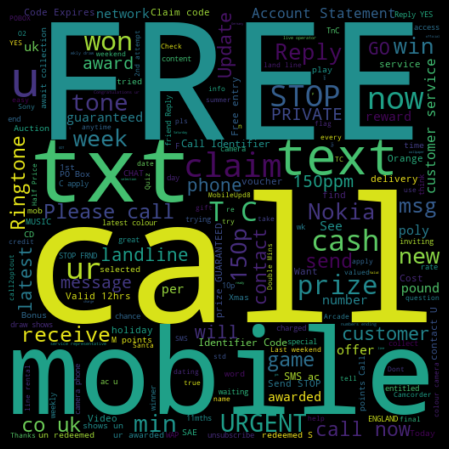

In [55]:
from wordcloud import WordCloud

text = " ".join(list(dataset[dataset["Label"] == "Spam"]["Message_body"]))

# Generate a word cloud image
wordcloud = WordCloud(width = 512,height = 512).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

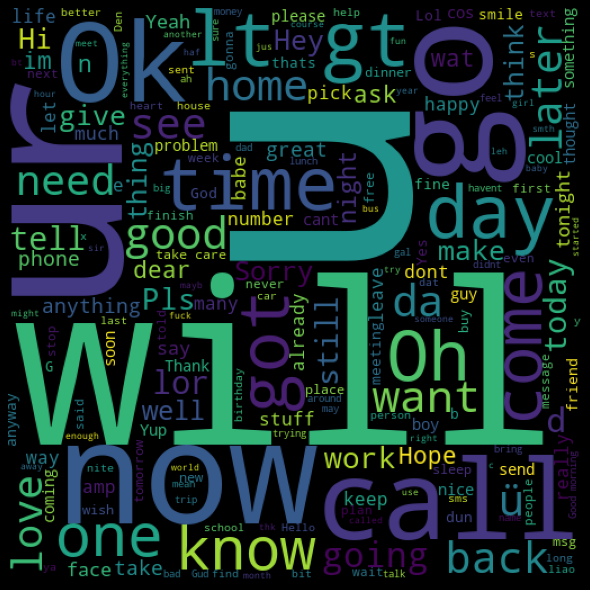

In [56]:
ham_words = ' '.join(list(dataset[dataset["Label"] == "Non-Spam"]["Message_body"]))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

<h3> Нормализуем данные

In [57]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'category']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'category']

In [71]:
for col_num in numerical_columns:
    if  not df[col_num].std(axis = 0):
        print(df[col_num])
        df.drop(col_num, axis=1, inplace=True)
        numerical_columns.remove(col_num)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: stolen, Length: 1082, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: citizen, Length: 1082, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: box177, Length: 1082, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: machan, Length: 1082, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: marvel, Length: 1082, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: sw7, Length: 1082, dtype: float64
0      0.0
1      

In [68]:
data_numerical = df[numerical_columns]
data_numerical.describe()

,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,eight,...,innocent,traffic,realise,goverment,malaria,gary,fights,player,working,limit
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.0
mean,0.001848,0.001848,0.001848,0.000924,0.000924,0.000924,0.001848,0.000924,0.001848,0.000924,...,0.000924,0.000924,0.002773,0.000924,0.002773,0.001848,0.000924,0.003697,0.003697,0.0
std,0.042973,0.042973,0.042973,0.030401,0.030401,0.030401,0.042973,0.030401,0.060802,0.030401,...,0.030401,0.030401,0.052607,0.030401,0.091203,0.042973,0.030401,0.060717,0.060717,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [59]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,eight,...,traffic,realise,goverment,malaria,gary,fights,player,working,revealing,limit
count,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,...,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,0.0,0.0
mean,2.485561e-16,2.906512e-16,2.608306e-16,-6.357232e-17,-5.217253e-16,-4.714215e-17,2.608434e-16,1.674633e-16,3.416219e-17,-1.903450e-16,...,-4.824904e-16,-2.602021e-16,-2.312986e-16,-2.217304e-16,2.429126e-16,-4.305321e-16,9.500256e-17,2.210313e-16,NaN,NaN
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN
min,-4.301326e-02,-4.301326e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,...,-3.040090e-02,-5.270467e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-6.088633e-02,-6.088633e-02,NaN,NaN
25%,-4.301326e-02,-4.301326e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,...,-3.040090e-02,-5.270467e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-6.088633e-02,-6.088633e-02,NaN,NaN
50%,-4.301326e-02,-4.301326e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,...,-3.040090e-02,-5.270467e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-6.088633e-02,-6.088633e-02,NaN,NaN
75%,-4.301326e-02,-4.301326e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,...,-3.040090e-02,-5.270467e-02,-3.040090e-02,-3.040090e-02,-4.301326e-02,-3.040090e-02,-6.088633e-02,-6.088633e-02,NaN,NaN
max,2.322716e+01,2.322716e+01,2.322716e+01,3.286337e+01,3.286337e+01,3.286337e+01,2.322716e+01,3.286337e+01,3.286337e+01,3.286337e+01,...,3.286337e+01,1.895611e+01,3.286337e+01,3.286337e+01,2.322716e+01,3.286337e+01,1.640887e+01,1.640887e+01,NaN,NaN


In [60]:
data = pd.concat((data_numerical, df['Label']), axis = 1)

In [61]:
data

,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,eight,...,realise,goverment,malaria,gary,fights,player,working,revealing,limit,Label
0,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
1,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
2,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
3,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
4,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
121,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
122,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam
123,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN,Non-Spam


In [62]:
X = data.drop('Label', axis = 1)
y = data['Label']

<h3> Повторим всю обработку для тестовой выборки

test_dataset = pd.read_csv("archive/SMS_test.csv", sep=',', encoding="Windows-1252")

df2 = tokenization(tokens, test_dataset)

df2.drop("Message_body", axis=1, inplace=True)
df2.drop("S. No.", axis=1, inplace=True)

df2.iloc[:,0] = df2.iloc[:,0].astype('category')

df2.head(10)

numerical_columns_test = [c for c in df2.columns if df2[c].dtype.name != 'category']

print(numerical_columns_test)

data_numerical_test = df2[numerical_columns_test]

print(data_numerical_test)

data_numerical_test = (data_numerical_test - data_numerical_test.mean(axis = 0))/data_numerical_test.std(axis = 0)

print(data_numerical_test)

data2 = pd.concat((data_numerical_test, df2['Label']), axis = 1)

X_test = data2.drop('Label', axis = 1)
y_test = data2['Label']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 50)

In [64]:
X_train

,shld,or2stoptxt,09064019788,area,pub/cafe,gre,//wap,argh,rally,eight,...,traffic,realise,goverment,malaria,gary,fights,player,working,revealing,limit
708,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
316,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
285,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
524,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
418,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
229,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
70,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN
132,-0.043013,-0.043013,-0.043013,-0.030401,-0.030401,-0.030401,-0.043013,-0.030401,-0.030401,-0.030401,...,-0.030401,-0.052705,-0.030401,-0.030401,-0.043013,-0.030401,-0.060886,-0.060886,NaN,NaN


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble

In [66]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').